In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import Subset
from torch.utils.data import DataLoader
from evolution import Population
import matplotlib.pyplot as plt
import time

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensor
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

subset_indices = torch.randperm(len(train_dataset))[:10000]
train_subset = Subset(train_dataset, subset_indices)

train_size = len(train_subset)
test_size = len(test_dataset)
train_loader = DataLoader(dataset=train_subset, batch_size=train_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=test_size, shuffle=False)

test_iter = iter(test_loader)
test_data = next(test_iter)

pop = Population(pop_size=200, input_size=28*28, hidden_size=10, output_size=10, dataloader=train_loader)

accuracies = []
times = []

print(len(pop.individuals))
print(pop.get_best_individual().fitness)

best = -10000
last_improve_count = 0

start_time = time.time()
while last_improve_count < 20:
    pop.advance_generation()
    
    gen_best = pop.get_best_individual().fitness
    print(gen_best, pop.get_best_individual().accuracy, end="    ")
    
    accuracies.append(pop.get_best_individual().calculate_fitness(test_data[0], test_data[1])[1])
    times.append(time.time() - start_time)
    
    if gen_best > best:
        best = gen_best
        print("best")
        last_improve_count = 0
    else:
        print("")
        last_improve_count += 1
        
end_time = time.time()

print("Total time:", end_time - start_time)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Accuracy over Generations')

plt.subplot(1,2,2)
plt.plot(times, accuracies)
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.tight_layout()
plt.show()

200
-2.2765109539031982
-2.2765109539031982 0.083    best
-2.271557331085205 0.1131    best
-2.271557331085205 0.1131    
-2.260953426361084 0.1531    best
-2.260953426361084 0.1531    
-2.2506392002105713 0.1235    best
-2.2506392002105713 0.1235    
-2.2475454807281494 0.1226    best
-2.244271993637085 0.1116    best
-2.244271993637085 0.1116    
-2.227524757385254 0.1079    best
-2.227524757385254 0.1079    
-2.2174651622772217 0.1449    best
-2.2149312496185303 0.1677    best
-2.2149312496185303 0.1677    
-2.205673933029175 0.161    best
-2.1847715377807617 0.2311    best
-2.1847715377807617 0.2311    
-2.1736557483673096 0.2384    best
-2.1736557483673096 0.2384    
-2.1607747077941895 0.2485    best
-2.15850830078125 0.2503    best
-2.1451919078826904 0.2583    best
-2.1451919078826904 0.2583    
-2.141468048095703 0.2305    best
-2.141468048095703 0.2305    
-2.141468048095703 0.2305    
-2.130032539367676 0.249    best
-2.122673749923706 0.2289    best
-2.122673749923706 0.228

KeyboardInterrupt: 

In [3]:
best_model = pop.get_best_individual()

loss, acc = best_model.calculate_fitness(test_data[0], test_data[1])

print(acc)


0.8301


In [4]:
from neural_net import MLP
'''

backprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)

epochs = 1000
for _ in range(epochs):
    backprop_nn.train_backprop(train_loader)
backprop_nn.calculate_fitness(test_data[0], test_data[1])
'''

'\n\nbackprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)\n\nepochs = 1000\nfor _ in range(epochs):\n    backprop_nn.train_backprop(train_loader)\nbackprop_nn.calculate_fitness(test_data[0], test_data[1])\n'

loss: 2.302572  [    0/10000]
Accuracy: 0.1972 Time: 0.9122095108032227
loss: 2.217216  [    0/10000]
Accuracy: 0.2719 Time: 1.8064098358154297
loss: 2.129169  [    0/10000]
Accuracy: 0.3423 Time: 2.623594284057617
loss: 2.034196  [    0/10000]
Accuracy: 0.4046 Time: 3.44577956199646
loss: 1.934915  [    0/10000]
Accuracy: 0.4361 Time: 4.335979700088501
loss: 1.843107  [    0/10000]
Accuracy: 0.4732 Time: 5.154163122177124
loss: 1.767840  [    0/10000]
Accuracy: 0.4733 Time: 6.035362005233765
loss: 1.695204  [    0/10000]
Accuracy: 0.4847 Time: 6.85754656791687
loss: 1.654046  [    0/10000]
Accuracy: 0.5055 Time: 7.670729398727417
loss: 1.585122  [    0/10000]
Accuracy: 0.5113 Time: 8.552928924560547
loss: 1.514345  [    0/10000]
Accuracy: 0.5662 Time: 9.371111631393433
loss: 1.461109  [    0/10000]
Accuracy: 0.5314 Time: 10.25731086730957
loss: 1.379108  [    0/10000]
Accuracy: 0.6225 Time: 11.074494361877441
loss: 1.315570  [    0/10000]
Accuracy: 0.5677 Time: 11.893678903579712
loss

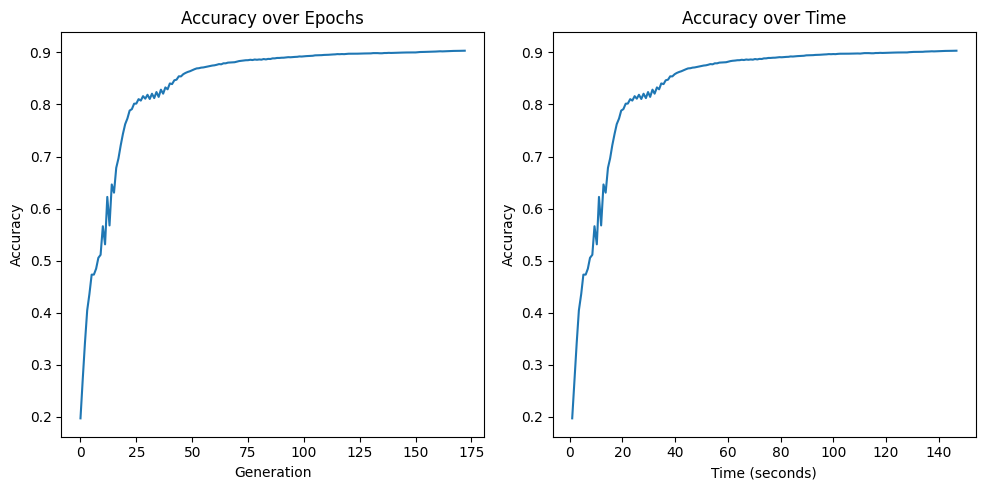

In [5]:
import time
import matplotlib.pyplot as plt

backprop_nn = MLP(input_size=28*28, hidden_size=10, output_size=10)

# Train until loss diference is minimal with unlimited epochs
loss_diff = 100
last_loss = 100
accuracies = []
times = []
start_time = time.time()

while loss_diff > 0.0005:
    loss = backprop_nn.train_backprop(train_loader)
    loss_diff = last_loss - loss
    last_loss = loss
    _, acc = backprop_nn.calculate_fitness(test_data[0], test_data[1])
    accuracies.append(acc)
    times.append(time.time() - start_time)
    end_time = time.time()
    print("Accuracy:", acc, "Time:", end_time - start_time)

#plot the accuracies
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(len(accuracies)), accuracies)
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(times, accuracies)
plt.xlabel('Time (seconds)')
plt.ylabel('Accuracy')
plt.title('Accuracy over Time')

plt.tight_layout()
plt.show()

In [6]:
_, acc = backprop_nn.calculate_fitness(test_data[0], test_data[1])
print(acc)

0.9033
